In [1]:
from numpy import empty, zeros ,max
from pylab import imshow, gray, show,hot,cool,inferno


Ejemplo 9.1: Solcuión de la Ecuación de Laplace:

Vamos a computar una solución a el problema electrostacio bi-dimensional de la Fig. 9.1. usando el metodo de Jacobi, para el caso en que la caja es de un metro a lo largo de cada lado, $V=1 volt$, y el espacido de la rejilla $a=1 cm$, entonces hay 100 puntos de la rejilla en cada lado, o 101 si contamos los puntos en el inicio y el final. Aqui hay un programa para calcular la solución y hacer un grafico de la densidad de los resultados:


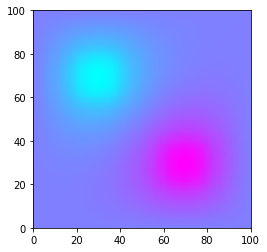

In [2]:
#constantes
M=100 
V=1 
a=1
e0=1  #8.8541e-12
target=1e-3

#Creando arrays para guardar los valores de potencial y los valores de la carga en cada punto
phi=zeros([M+1,M+1],float)
phi[0,:]=0
rho=zeros([M+1,M+1],float)   #matriz de densidad
rho[60:80,20:40]=-1.0
rho[20:40,60:80]=1.0
phiprime=empty([M+1,M+1],float)

#main loop
delta=1.0
while delta>target:
    
    #calculo nuevo valor del potencial
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==M or j==0:
                phiprime[i,j]=phi[i,j]
            else:
                phiprime[i,j]=(phi[i+a,j]+phi[i-a,j]+phi[i,j+a]+phi[i,j-a])/4 + ((a*a)/(e0))*(rho[i,j])/4
    
     #Calculando la diferencia maxima de los valores viejos
    delta=max(abs(phi-phiprime))
    #Cambiando los dos arrays
    phi,phiprime=phiprime,phi
    

#Hacer grafico
imshow(phi,origin="lower", extent=[0, 100, 0, 100])
cool()
show()